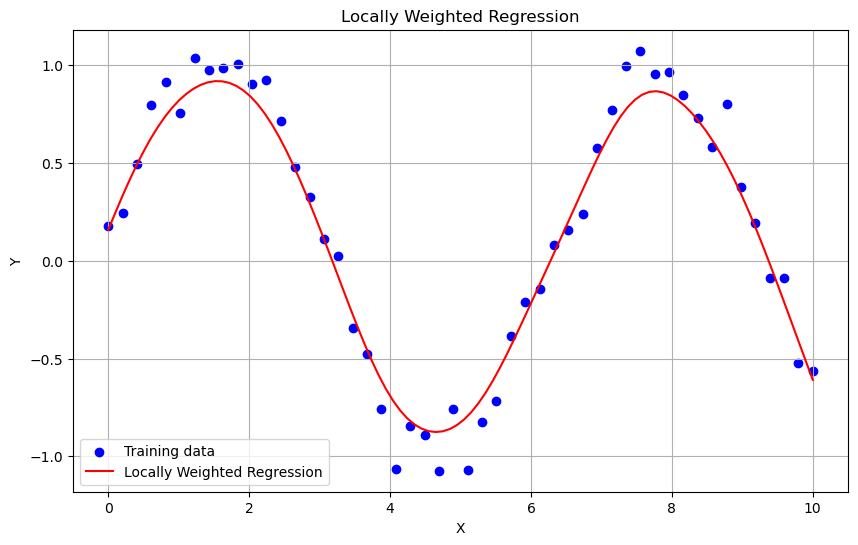

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def locally_weighted_regression(x_query, X_train, y_train, tau=0.1):
    weights = np.exp(-np.sum((X_train - x_query) ** 2, axis=1) / (2 * tau ** 2))
    W = np.diag(weights)
    theta = np.linalg.pinv(X_train.T @ W @ X_train) @ (X_train.T @ W @ y_train)
    return x_query @ theta
# Generate synthetic data
np.random.seed(0)
X_train = np.linspace(0, 10, 50)
y_train = np.sin(X_train) + np.random.normal(0, 0.1, X_train.shape[0])
# Perform Locally Weighted Regression
tau = 0.5
X_query = np.linspace(0, 10, 100)
predictions = [locally_weighted_regression(np.array([1, xq]), np.c_[np.ones(X_train.shape[0]),
X_train], y_train, tau) for xq in X_query]
# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_query, predictions, color='red', label='Locally Weighted Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Locally Weighted Regression')
plt.legend()
plt.grid(True)
plt.show()